# Aprendizaje Supervisado - Regresión
En este notebook comenzamos a trabajar en los problemas de Regresión, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Regresión en Machine Learning consiste en aprender __etiquetas numéricas contínuas__ y a partir de un conjunto de atributos/features X (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

En la primera sección, vamos a comenzar introduciendo un dataset sintético unidimensional (un atributo + y), siguiendo una relación lineal. Y trataremos de aprender a predecir usando los siguientes modelos: Regresión Lineal, Árboles de Decisión y kNN. Luego, veremos cómo son las curvas obtenidas para cada modelo y cómo son los errores.

En la segunda sección, pasaremos a dos atributos (2D), el límite de lo que podremos visualizar. Pero podríamos trabajar aún con más atributos!

## 1. Un atributo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 500 puntos provenientes de una __relación lineal 1-D__ de la forma  __y=3x−2__ . Asegúrate de identificar correctamente la pendiente y la ordenada al origen. Además, presta atención a que le sumamos ruido, para simular una situación un poco más realista.

In [3]:
n = 500
X = np.linspace(-2,3,n) # n significa que dividimos de forma homogénea la cantidad de datos (500)
y_real = 3*X - 2
#y_real = X**2

y = y_real + 1.0*np.random.randn(n)

In [13]:
X.shape

(500, 1)

In [14]:
y.shape

(500,)

Y graficamos los puntos obtenidos junto con la curva teórica.

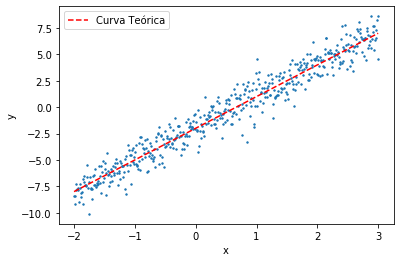

In [5]:
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez. Pero antes, no nos olvidemos del `train_test_split`

In [6]:
from sklearn.model_selection import train_test_split

print (X.shape)
X = X.reshape(-1,1) # Convertimos el vector escalar en vector de 1 columna!!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print (X.shape)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(500,)
(500, 1)
(350, 1) (350,) (150, 1) (150,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [8]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Veamos qué aprendieron.

La regresión lineal obtiene la `pendiente` y la `ordenada al origen`.

In [9]:
print(linear_model.coef_, linear_model.intercept_)

[2.99801094] -1.9564986513191251


¿Están cerca de los valores reales?

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

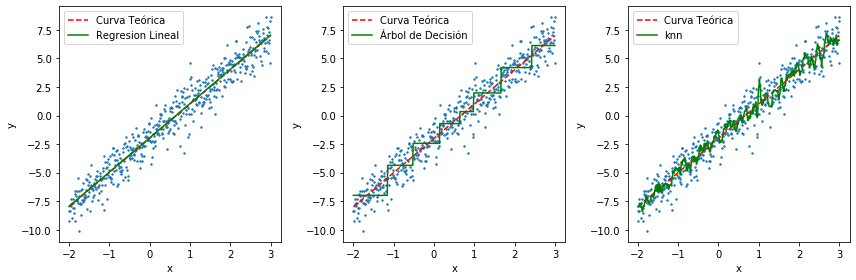

In [10]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r') # Función Real
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g') # Función Predicha Creada por el Modelo
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g') # Cortes Verticales y Horizontles, por eso da gráfica escalonada. A más específico, saltos más chicos.

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g') # El "ruido" se debe a que se trata de números contínuos.

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Prestar atención a que la regresión lineal hace un muy buen trabajo en reproducir la curva teórica. ¿Qué te parecen los otros modelos?

Veamos qué aprendió el árbol:

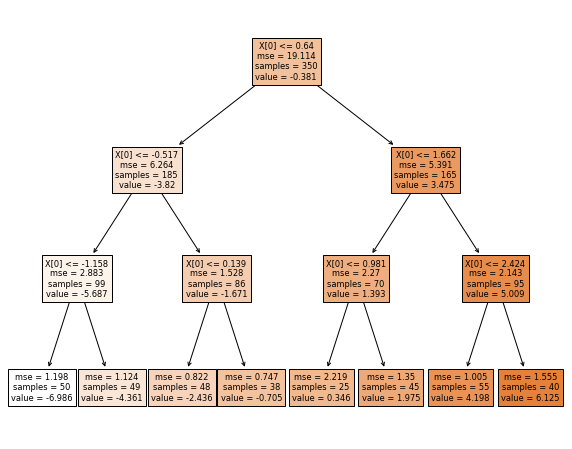

In [11]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

__Para pensar:__ ¿Cómo se relaciona este arbol con la curva obtenida?

Veamos ahora cómo son los __errores obtenidos__. Vamos a hacer todo en la misma celda, pero tiene tres componentes importantes:

1. El cálculo del RMSE para cada conjunto (train y test).
2. Un gráfico de dispersión de  y  vs  y_predicho  para el conjunto de test. ¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
3. El histograma de los errores ( y−y_predicho ) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.0644622011293616
Raíz del error cuadrático medio en Test: 0.9524606076051543


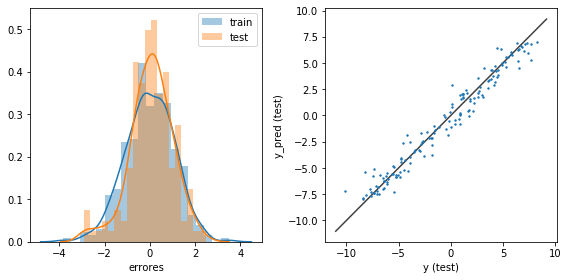

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.0909413673457682
Raíz del error cuadrático medio en Test: 1.1722954259142504


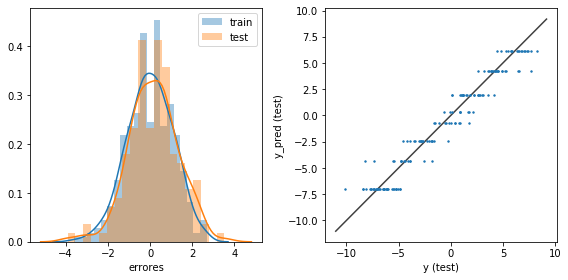

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.9339180450193701
Raíz del error cuadrático medio en Test: 1.0421854499543985


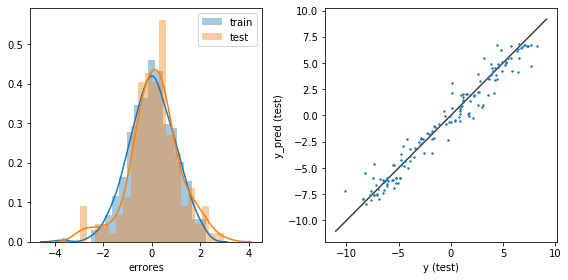

In [12]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En todos los casos, ocurre algo parecido:

1. Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste.
2. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
3. En el gráfico  y  vs  ypredicho  para el conjunto de test, todos los puntos están cerca de la diagonal (la relación  y=x ), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores. Importante: asegúrate de que entiendes este gráfico (¿qué ocurre en el caso del árbol?), el hecho de que los puntos deban estar sobre la recta diagonal  y=x  no está relacionado con que estamos aproximando una relación lineal.

__Para probar:__ dedicale un buen tiempo a probar distintos valores de max_depth y de n_neighbors. ¿Qué ocurre cuando n_neighbors = 1?¿Puedes diferenciar en el gráfico cuáles instancias se usaron para entrenamiento y cuáles para testeo?¿Y si n_neighbors tiende a la cantidad de instancias en el set de entrenamiento qué sucede?

__Para probar:__ una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Presta atención a las siguientes preguntas. ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?